<a href="https://colab.research.google.com/github/wmartinez97/mi-proyecto/blob/main/Taller_CART_PR_040625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Este NOTEBOOK contiene un ejercicio para clasificar usando ML con el modelo CART

Inicialmente se importan las librerrias

In [2]:
!pip install earthpy gdal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 43.0 MB/s eta 0:00:00


In [4]:
from glob import glob
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go

np.seterr(divide="ignore", invalid="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

Ahora se monta el drive con los archivos

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
%cd /content/drive/MyDrive/PR_2025/DATOS_CLASE/sundarbans_data/

/content/drive/MyDrive/PR_2025/DATOS_CLASE/sundarbans_data


In [29]:
!ls

'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B12_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B8A_(Raw).tiff'
 2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_Highlight_Optimized_Natural_Color.png
 2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_Highlight_Optimized_Natural_Color.tiff
 2020-01-27-00_00_2020-01-27-23

In [30]:
S_sentinel_bands = glob("/content/drive/MyDrive/PR_2025/DATOS_CLASE/sundarbans_data/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['/content/drive/MyDrive/PR_2025/DATOS_CLASE/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/content/drive/MyDrive/PR_2025/DATOS_CLASE/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/content/drive/MyDrive/PR_2025/DATOS_CLASE/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/content/drive/MyDrive/PR_2025/DATOS_CLASE/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/content/drive/MyDrive/PR_2025/DATOS_CLASE/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/content/drive/MyDrive/PR_2025/DATOS_CLASE/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/content/drive/MyDrive/PR_2025/DATOS_CLASE/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/content/drive/MyDrive/PR_2025/DATOS_CLASE/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B

In [33]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
   l.append(f.read(1))

In [35]:
arr_st = np.stack(l)
print(f'Height: {arr_st.shape[1]}\nWidth: {arr_st.shape[2]}\nBands: {arr_st.shape[0]}')

Height: 954
Width: 298
Bands: 12


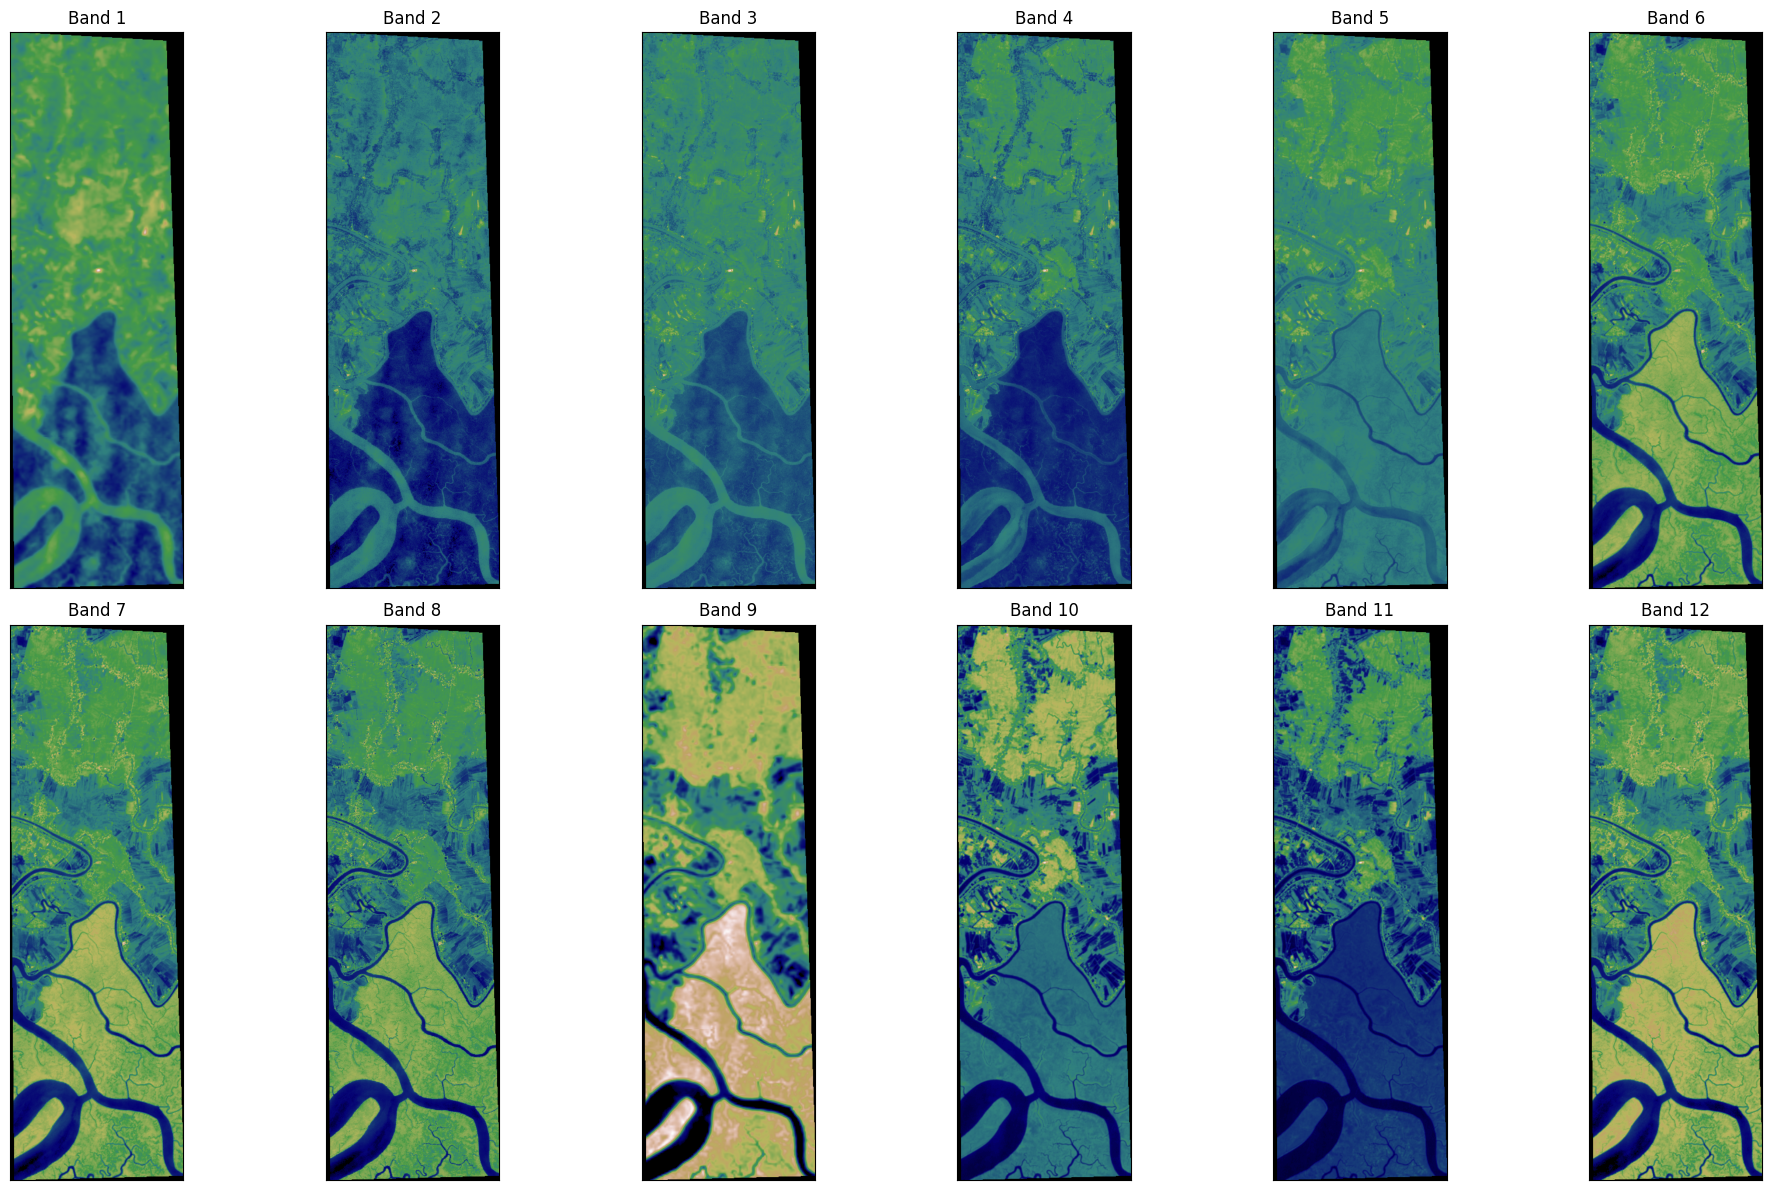

In [36]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

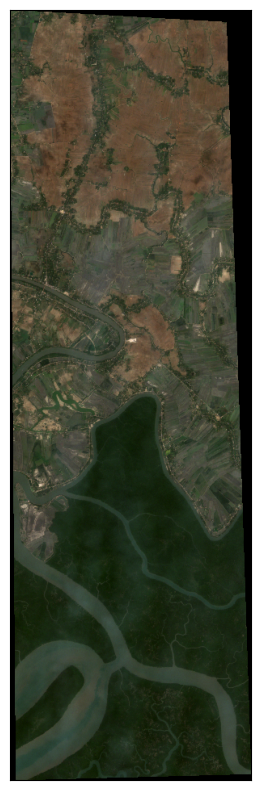

In [37]:
rgb = ep.plot_rgb(arr_st,
                  rgb=(3,2,1),
                  figsize=(8, 10),
                  # title='RGB Composite Image'
                  )
plt.show()

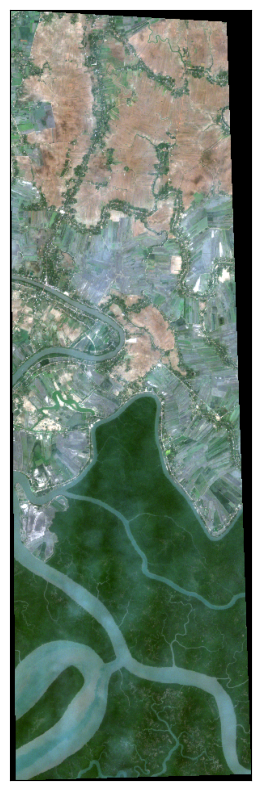

In [38]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)
plt.show()

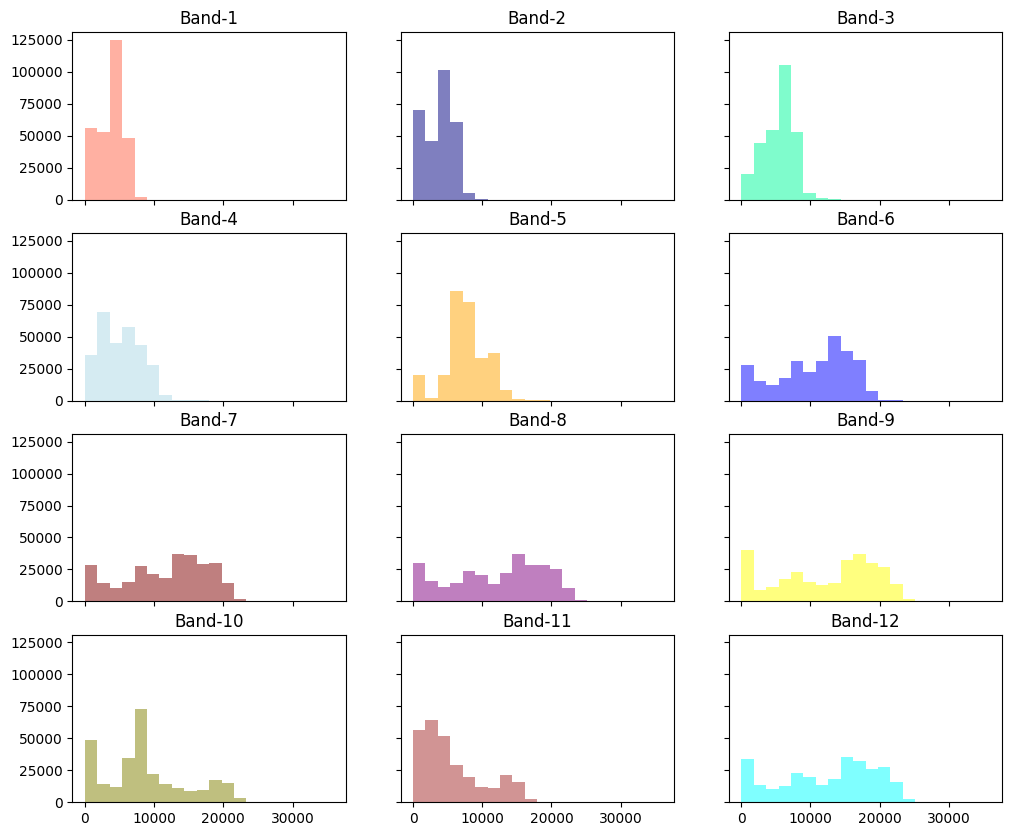

In [39]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']
ep.hist(arr_st,
          colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)],
        cols=3,
        alpha=0.5,
        figsize = (12, 10)
        )
plt.show()

Preprocesamiento

In [40]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(954, 298, 12)

In [41]:
from sklearn.preprocessing import StandardScaler
X_data = x.reshape(-1, 12)
scaler = StandardScaler().fit(X_data)
X_scaled = scaler.transform(X_data)
X_scaled.shape

(284292, 12)

In [42]:
y_data = loadmat('/content/drive/MyDrive/PR_2025/DATOS_CLASE/sundarbans_data/Sundarbands_gt.mat')['gt']
y_data.shape

(954, 298)

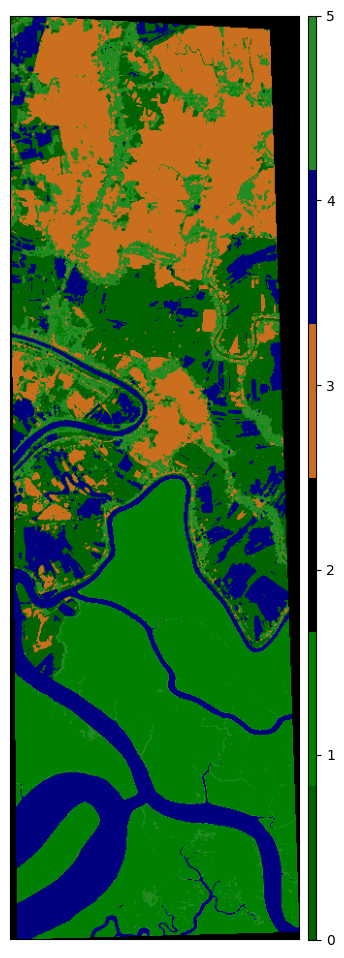

In [43]:
ep.plot_bands(y_data, cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data.ravel(), test_size=0.30, stratify = y_data.ravel())

In [47]:
print(f'X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape:{y_test.shape}')

X_train Shape: (199004, 12)
X_test Shape: (85288, 12)
y_train Shape: (199004,)
y_test Shape:(85288,)


In [ ]:
Arboles de decisión

In [48]:
from sklearn import tree
arbol = tree.DecisionTreeClassifier()
arbol = arbol.fit(X_train, y_train)

arbol_pred = arbol.predict(X_test)

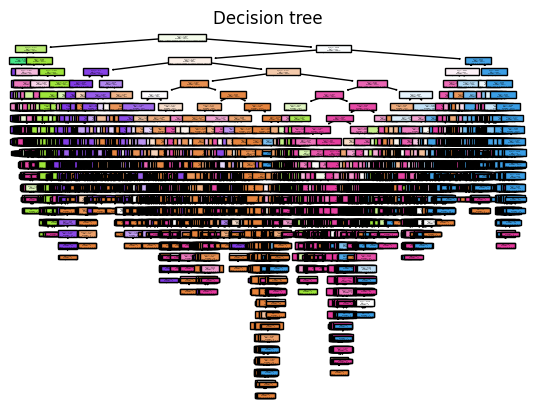

In [49]:
from sklearn.tree import plot_tree
plt.figure()
plot_tree(arbol, filled=True)
plt.title("Decision tree")
plt.show()

In [50]:
print(f"Accuracy: {accuracy_score(y_test, arbol_pred)*100}")

Accuracy: 97.78749648250633


In [51]:
print(classification_report(y_test, arbol_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16222
           1       0.99      0.99      0.99     23570
           2       1.00      1.00      1.00      6095
           3       0.99      0.99      0.99     16790
           4       0.98      0.98      0.98     13545
           5       0.93      0.93      0.93      9066

    accuracy                           0.98     85288
   macro avg       0.98      0.98      0.98     85288
weighted avg       0.98      0.98      0.98     85288



Visualiación de la clasificación

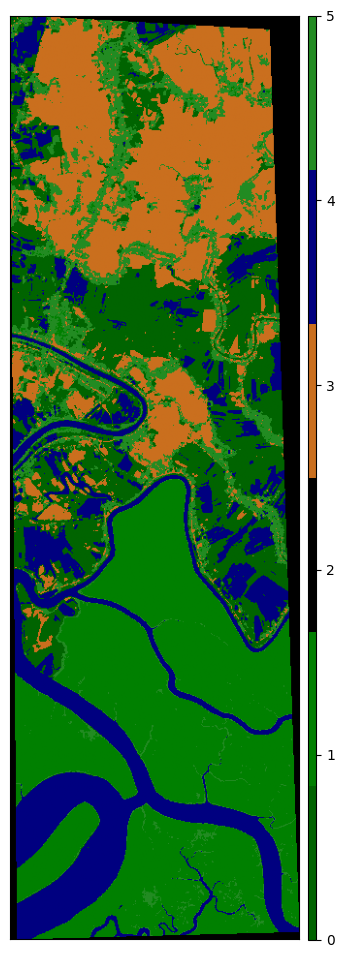

In [52]:
ep.plot_bands(arbol.predict(X_scaled).reshape((954, 298)),
              cmap=ListedColormap(['darkgreen', 'green', 'black',
                                    '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

Podado del árbol

In [53]:
# Decision tree with pre-pruning (max_depth)
arbolito = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
arbolito.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

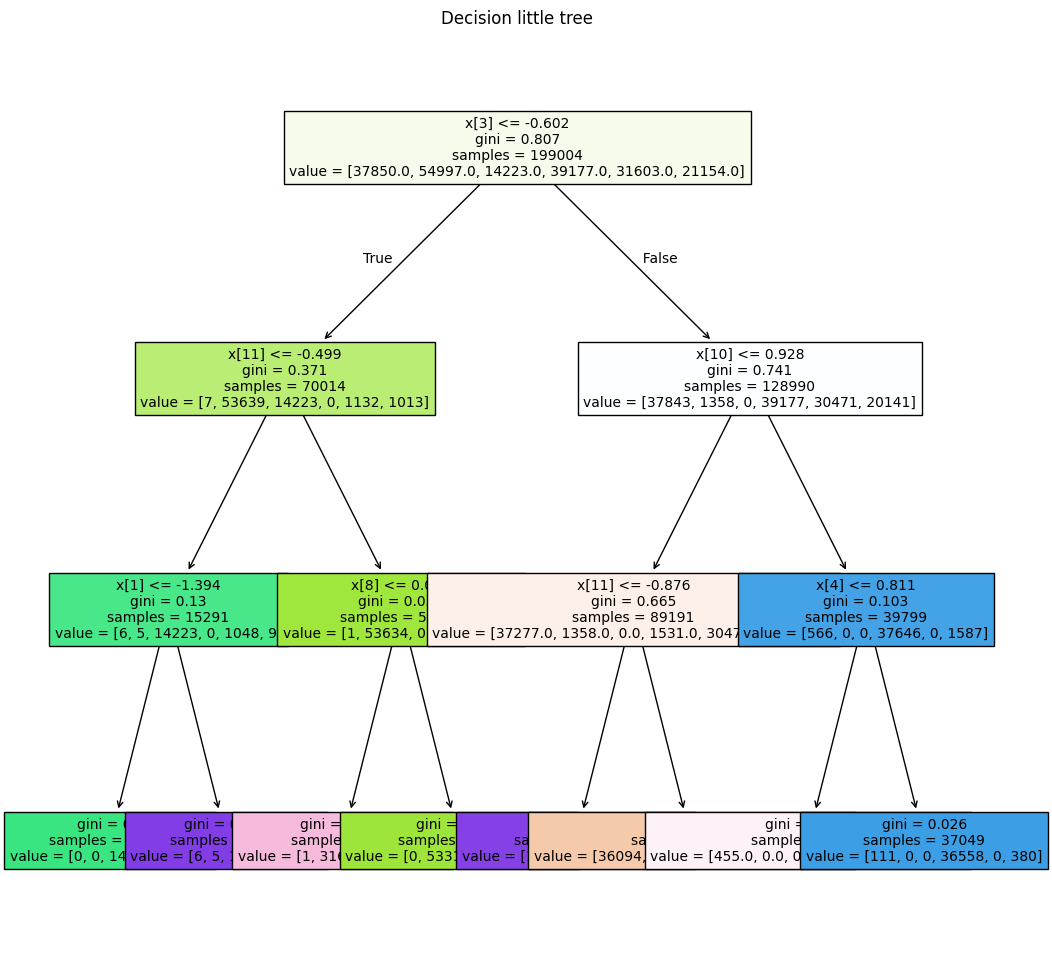

In [54]:
arbolito_pred = arbolito.predict(X_test)
plt.figure(figsize=(12,12)) # set plot size (denoted in inches)
plot_tree(arbolito, filled=True, fontsize=10)
plt.title("Decision little tree")
plt.show()

In [55]:
print(f"Accuracy: {accuracy_score(y_test, arbolito_pred)*100}")

Accuracy: 85.85498546102616


In [56]:
print(classification_report(y_test, arbolito_pred))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74     16222
           1       0.99      0.97      0.98     23570
           2       1.00      1.00      1.00      6095
           3       0.99      0.93      0.96     16790
           4       0.96      0.92      0.94     13545
           5       0.46      0.08      0.14      9066

    accuracy                           0.86     85288
   macro avg       0.83      0.81      0.79     85288
weighted avg       0.86      0.86      0.83     85288



Visualización de la clasificación generada por el arbolito

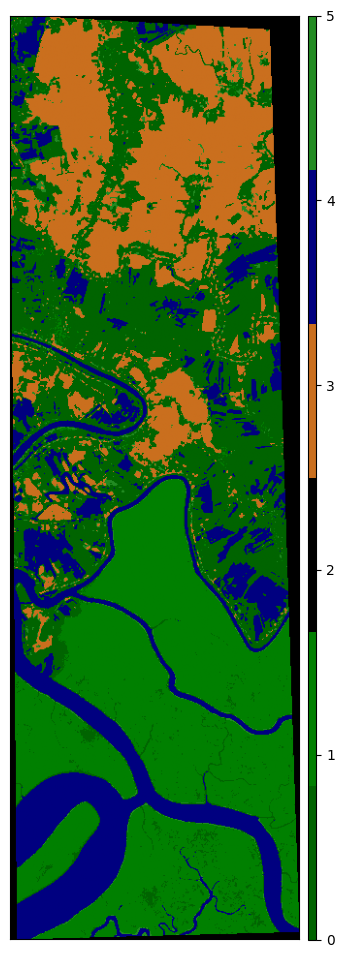

In [57]:
ep.plot_bands(arbolito.predict(X_scaled).reshape((954, 298)),
              cmap=ListedColormap(['darkgreen', 'green', 'black',
              '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

Tuneando los hiperparametros

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': range(1, 5, 1),
    'min_samples_leaf': range(20, 50, 5),
    'min_samples_split': range(20, 50, 5),
    'criterion': ["entropy", "gini"]
}
tree3 = tree.DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree3, param_grid=param_grid,
cv=5, verbose=True)
grid_search.fit(X_train, y_train)
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
best accuracy 0.9407449123459564
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=20,
                       min_samples_split=20, random_state=1)


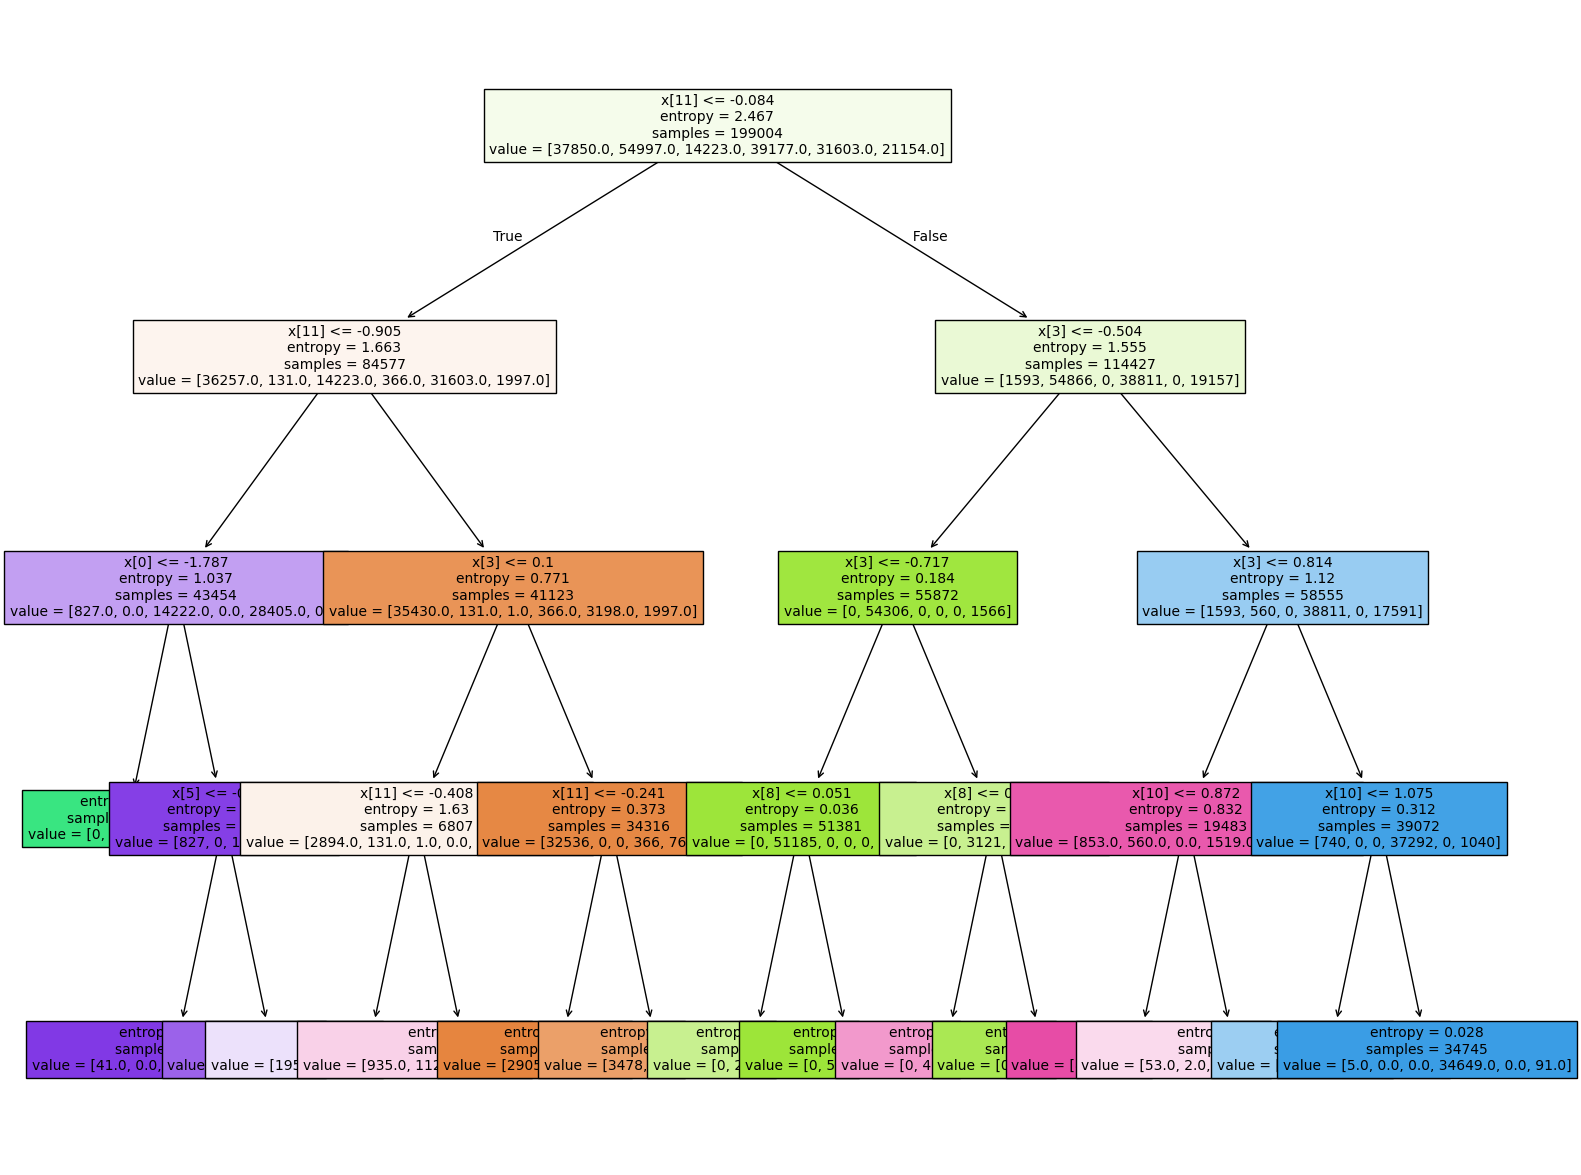

In [59]:
#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt
tree_clf = grid_search.best_estimator_
plt.figure(figsize=(18, 15))
plot_tree(tree_clf, filled=True, fontsize=10)
plt.show()

In [60]:
tree3_pred = tree_clf.predict(X_test)

Accuracy: 93.99212081418253
print(f"Accuracy: {accuracy_score(y_test, tree3_pred)*100}")

Accuracy: 94.25007034987337


In [61]:
print(classification_report(y_test, tree3_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     16222
           1       0.99      0.98      0.98     23570
           2       1.00      1.00      1.00      6095
           3       0.95      0.95      0.95     16790
           4       0.92      0.97      0.94     13545
           5       0.81      0.89      0.85      9066

    accuracy                           0.94     85288
   macro avg       0.94      0.94      0.94     85288
weighted avg       0.94      0.94      0.94     85288

